# Blood Pressure - Body Event - Body Health

## Library

In [20]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [21]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/blood_pressure.json') as file:
    data = json.load(file)

## Event

Event date: December 29, 2023 at 01:07



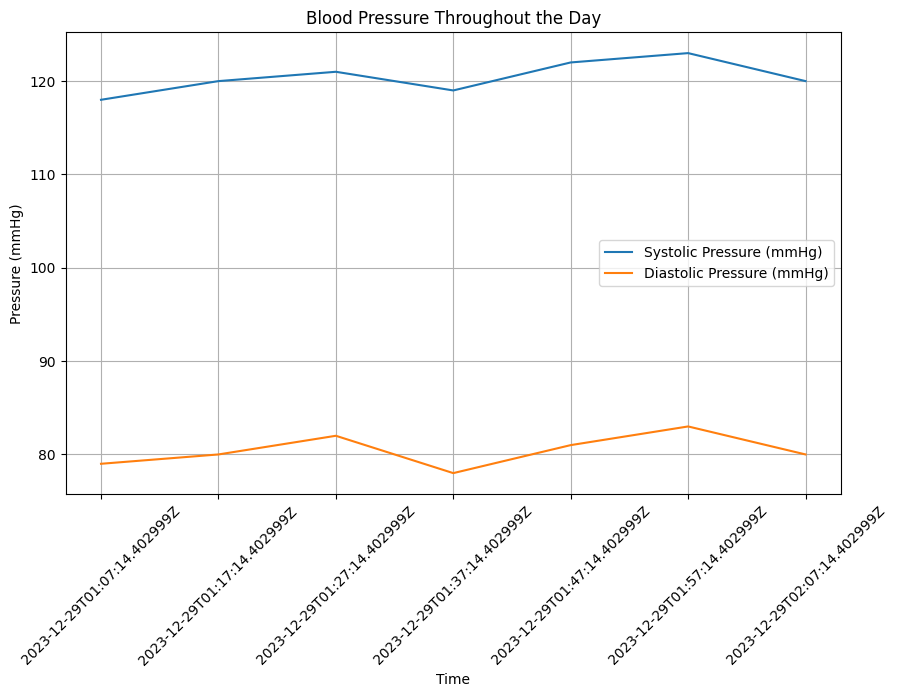

Blood Pressure Average: Systolic 120 mmHg - Diastolic 80 mmHg
Blood Pressure Systolic: 118 mmHg - 123 mmHg
Blood Pressure Diastolic: 78 mmHg - 83 mmHg


In [22]:
# Extract Blood Glucose
blood_pressure_avg = data['body_health']['events']['blood_pressure_event']['blood_pressure']['blood_pressure_avg_object']
blood_pressure_granular = data['body_health']['events']['blood_pressure_event']['blood_pressure']['blood_pressure_granular_data_array']
original_date = data['body_health']['events']['blood_pressure_event']['metadata']['datetime_string']


def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)
print(f"Event date: {translated_date}\n")

# Check if there is data in blood_pressure_granular_data_array
if blood_pressure_granular:
    # Convert data to a DataFrame
    blood_pressure_granular_df = pd.DataFrame(blood_pressure_granular)
    blood_pressure_granular_df['datetime'] = pd.to_datetime(blood_pressure_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(blood_pressure_granular_df["datetime_string"], blood_pressure_granular_df["systolic_mmHg_int"], label="Systolic Pressure (mmHg)")
    plt.plot(blood_pressure_granular_df["datetime_string"], blood_pressure_granular_df["diastolic_mmHg_int"], label="Diastolic Pressure (mmHg)")


    # Setting up labels and title
    plt.title("Blood Pressure Throughout the Day")
    plt.xlabel("Time")
    plt.ylabel("Pressure (mmHg)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show the graphic
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, "Blood Pressure Chart: No granular data available", 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# Convert data Average to a DataFrame
if blood_pressure_avg:  # Ensure blood_pressure_avg is not empty before converting
    blood_pressure_avg_df = pd.DataFrame([blood_pressure_avg])  # Wrap the dictionary in a list to create a DataFrame
    
# Check Blood Pressure Average
if not blood_pressure_avg and not blood_pressure_granular:
    blood_pressure_avg_result = "Blood Pressure Average: No values ​​were obtained or it is null."

elif not blood_pressure_avg:
    blood_pressure_avg_systolic = blood_pressure_granular_df["systolic_mmHg_int"].mean()
    blood_pressure_avg_diastolic = blood_pressure_granular_df["diastolic_mmHg_int"].mean()
    blood_pressure_avg_result = f"Blood Pressure Average: Systolic {blood_pressure_avg_systolic:.2f} mmHg - Diastolic {blood_pressure_avg_diastolic:.2f} mmHg"

else:
    blood_pressure_avg_systolic = blood_pressure_avg_df["systolic_mmHg_int"].iloc[0]
    blood_pressure_avg_diastolic = blood_pressure_avg_df["diastolic_mmHg_int"].iloc[0]
    blood_pressure_avg_result = f"Blood Pressure Average: Systolic {blood_pressure_avg_systolic} mmHg - Diastolic {blood_pressure_avg_diastolic} mmHg"

    
# Get the minimum and maximum pressure values ​​of the DataFrame
if blood_pressure_granular:
    min_pressure_systolic = blood_pressure_granular_df['systolic_mmHg_int'].min()
    max_pressure_systolic = blood_pressure_granular_df['systolic_mmHg_int'].max()
    pressure_systolic_result = f"Blood Pressure Systolic: {min_pressure_systolic} mmHg - {max_pressure_systolic} mmHg"
else:
    pressure_systolic_result = 'Blood Pressure Systolic: No values ​​were obtained or it is null.'
    
if blood_pressure_granular:
    min_pressure_diastolic = blood_pressure_granular_df['diastolic_mmHg_int'].min()
    max_pressure_diastolic = blood_pressure_granular_df['diastolic_mmHg_int'].max()
    pressure_diastolic_result = f"Blood Pressure Diastolic: {min_pressure_diastolic} mmHg - {max_pressure_diastolic} mmHg"
else:
    pressure_diastolic_result = 'Blood Pressure Diastolic: No values ​​were obtained or it is null.'

print(blood_pressure_avg_result)
print(pressure_systolic_result)
print(pressure_diastolic_result)

